In [1]:
import geopandas as gpd
from tqdm import tqdm
import numpy as np
import rasterio
from rasterio.features import geometry_mask
from matplotlib import pyplot as plt
import xarray as xr
import os,shutil

In [2]:
gdf = gpd.read_file("./county_region_polygon_8656.shp")

In [3]:
# 将gdf的geometry格式改为经纬度
gdf.geometry = gdf.geometry.to_crs(epsg=4326)

In [4]:
geometry = gdf.geometry.values
cnty_code = gdf.CNTY_CODE.values

In [5]:
# 新建一个分辨率为0.0001的数组
interval=0.01
x_range = np.arange(73.5, 135.5, interval)
y_range = np.arange(54.0, 9.5 , -interval)
x_size,y_size = interval,interval
result_array = np.empty((len(y_range), len(x_range)), dtype=np.int32)
result_array[:,:] = -999

(4450, 6200)

In [7]:
transform: rasterio.transform.Affine = rasterio.transform.from_origin(
        x_range[0], y_range[0], x_size, y_size
    )

In [8]:
for (i_code,i_geo) in tqdm(zip(cnty_code, geometry),total=2587):
    mask: np.ndarray = geometry_mask(
            [i_geo],
            out_shape=(len(y_range), len(x_range)),
            transform=transform,
            invert=True,
        )
    result_array[mask] = i_code

100%|██████████| 2587/2587 [01:45<00:00, 24.41it/s]


In [10]:
import numpy as np
import xarray as xr

# Assuming y_range, x_range, and result_array are already defined
# y_range and x_range should be 1-dimensional arrays representing latitude and longitude
# result_array should be a 2-dimensional array containing the values for the dataset

# Create coordinate arrays for latitude and longitude
latitude = xr.DataArray(y_range, dims='latitude', coords={'latitude': y_range})
longitude = xr.DataArray(x_range, dims='longitude', coords={'longitude': x_range})

# Create a DataArray from result_array with latitude and longitude coordinates
data_array = xr.DataArray(result_array, dims=('latitude', 'longitude'), coords={'latitude': latitude, 'longitude': longitude})

# Create an xr.Dataset
ds = xr.Dataset({'code': data_array})

# Print the dataset structure
if os.path.exists("china_code.zarr")
    shutil.rmtree("china_code.zarr")
ds.to_zarr("china_code.zarr")


<xarray.Dataset>
Dimensions:    (latitude: 4450, longitude: 6200)
Coordinates:
  * latitude   (latitude) float64 54.0 53.99 53.98 53.97 ... 9.54 9.53 9.52 9.51
  * longitude  (longitude) float64 73.5 73.51 73.52 73.53 ... 135.5 135.5 135.5
Data variables:
    code       (latitude, longitude) int16 -99 -99 -99 -99 ... -99 -99 -99 -99


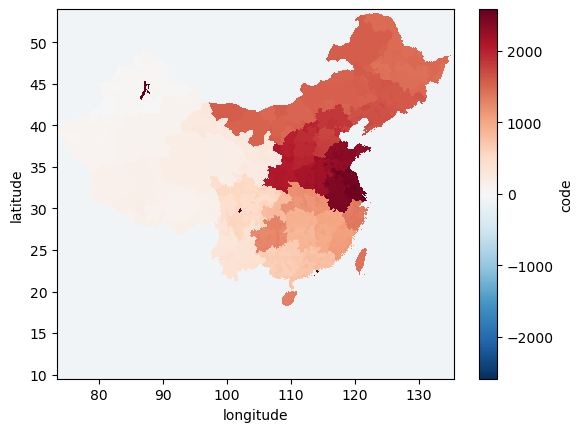

In [12]:
dataset.code.plot()